# TensorFlow & Keras - Basics of Deep Learning

### Most importantly... resources

https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

## TF overview

* #### "End-to-end machine learning platform" 

    - Not the only one! Check out PyTorch, Theano, Cognitive Toolkit.
   
* #### Integrates with high-level APIs like Keras
* #### Plays nice with Pandas
* #### Makes deep learning *fast* and *easy* *
    *<sup>"easy"</sup>

## Tasks for TensorFlow:

* #### Regression
    - Predict house prices
    - Predict drug metabolic rates
    - Predict stock trends *
    
    *<sup>this is super hard</sup>
    
    

* #### Classification
    - Cat or dog?
    - Malignant or benign cancer from images
    ![](media/dr.png)
    <span style="font-size:0.75em;">Google AI Blog: Diabetic Retinopathy</span>



* #### Dimensionality reduction
    - Visualize high-dimensional data in 2 or 3-D space
    - Compress representations for successive ML



* #### Generative models
    - Create new molecules with desirable properties
    - Artificially enhance image resolution
    ![](media/molecular_gan.png)
    <span style="font-size:0.75em;">Kadurin et al., 2017</span>


* #### Reinforcement learning
    - Can't beat your friends at chess? Make your computer do it



* #### Much more...
    - Generic math
    - Probabilistic programming with TFP
    - Automatic differentiation
    - ...


## Let's Regress

### Imports!

In [1]:
import numpy as np
import pandas as pd

Name a more iconic duo, I'll wait

#### New imports -- TF and Keras

In [2]:
import keras
import tensorflow as tf

Using TensorFlow backend.


Check our versions for good measure -- these programs may have very different behavior version-to-version

In [4]:
print(keras.__version__)
print(tf.__version__)

2.2.4
1.12.0


#### Loading in housing data as with SKLearn

In [6]:
data = pd.read_csv('kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
column_selection = ["bedrooms","bathrooms","sqft_living","sqft_lot",
                    "floors","condition","grade","sqft_above",
                    "sqft_basement","sqft_living15","sqft_lot15",
                    "lat", "long","yr_built","yr_renovated","waterfront"]

selected_feature = np.array(data[column_selection])
price = np.array(data["price"])
selected_feature_train = selected_feature[:20000]
price_train = price[:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]

In [8]:
def score(y,y_pred):
    return np.mean(np.abs(y-y_pred)/y)

In [9]:
model = keras.Sequential()

In [10]:
input_len = len(column_selection)
model.add(keras.layers.Dense(50, input_dim=input_len, activation='relu'))
model.add(keras.layers.Dense(50, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')


In [11]:
history = model.fit(selected_feature_train, price_train, epochs=50, batch_size=128)

Epoch 1/50
20000/20000 [==============================] - 2s 98us/step - loss: 365669033495.7568
Epoch 2/50
20000/20000 [==============================] - 1s 44us/step - loss: 256892456638.8736
Epoch 3/50
20000/20000 [==============================] - 1s 46us/step - loss: 118581314053.7344
Epoch 4/50
20000/20000 [==============================] - 1s 44us/step - loss: 77825994561.9456
Epoch 5/50
20000/20000 [==============================] - 1s 46us/step - loss: 74435019171.4304
Epoch 6/50
20000/20000 [==============================] - 1s 42us/step - loss: 72377106844.8768
Epoch 7/50
20000/20000 [==============================] - 1s 43us/step - loss: 70845085161.8816
Epoch 8/50
20000/20000 [==============================] - 1s 44us/step - loss: 69536943413.6576
Epoch 9/50
20000/20000 [==============================] - 1s 43us/step - loss: 68377267208.1920
Epoch 10/50
20000/20000 [==============================] - 1s 43us/step - loss: 67398507482.3168
Epoch 11/50
20000/20000 [===========

In [12]:
preds = model.predict(selected_feature_test)
score(preds, price_test)

0.5347612664268558

### Like SKLearn, it's easy to train and evaluate simple models.
#### ... but we should try to do better

## Practical Deep Learning -- What you need to know
### Train, Validation, Test:
   * Optimize parameters with Train (weights, biases)
   * Optimize hyperparameters with Validation (layer width & depth, activation functions, etc.)
   * Optimize NOTHING with Test

In [12]:
# Split out a validation set for hyperparameter optimization

selected_feature_train = selected_feature[:18000]
price_train = price[:18000]

selected_feature_val = selected_feature[18000:20000]
price_val = price[18000:20000]

selected_feature_test = selected_feature[20000:]
price_test = price[20000:]


#### In the future, try better validation schemes like [k-fold cross validation](https://chrisalbon.com/deep_learning/keras/k-fold_cross-validating_neural_networks/), though 80/20 or 90/10 train/val like this works in a pinch

### Try a hyperparameter optimization:

### Try three activation functions to use for dense layers in the neural network above. Save the model that achieves the best validation loss 

#### Hint: [activation functions](http://letmegooglethat.com/?q=keras+activation+functions)

#### Hint: `model.fit` has argument "`validation_data`" which takes a tuple of features and targets

#### Hint: Use `model.save("filename.h5")` to save a model locally. If you want to use it later, just call `keras.models.load_model("filename.h5")`

In [14]:
# For easy looping, define neural network model as a function
def nn_model(optimizer='adam',
             activation='relu',
             layers=[20,20],
             loss='mean_squared_error'):
    
    model = keras.Sequential()
    model.add(keras.layers.Dense(50, input_dim=input_len, activation=activ))
    model.add(keras.layers.Dense(50, activation=activ))
    model.add(keras.layers.Dense(1))

    model.compile(loss='mean_absolute_error', optimizer='adam')
    
    return model



In [15]:
best_score = 1000.0 # bad

# loop over chosen activation functions, train, evaluate on validation
for activ in ['sigmoid', 'tanh', 'relu']:
    model = nn_model(activation=activ)

    history = model.fit(selected_feature_train, price_train,
                epochs=50, batch_size=128,
                validation_data=(selected_feature_val, price_val))
    model_score = score(model.predict(selected_feature_test), price_test)

    if model_score < best_score:
        best_score = model_score
        best_activ = activ
        best_model = model
        best_train = history

print(f"BEST ACTIVATION FUNCTION {best_activ} WITH SCORE {best_score}")
best_model.save("awesome_model.h5")

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 2s 103us/step - loss: 532976.1402 - val_loss: 557917.1435
Epoch 2/50
18000/18000 [==============================] - 1s 53us/step - loss: 532970.0954 - val_loss: 557911.8150
Epoch 3/50
18000/18000 [==============================] - 1s 50us/step - loss: 532965.0778 - val_loss: 557906.8585
Epoch 4/50
18000/18000 [==============================] - 1s 50us/step - loss: 532959.7826 - val_loss: 557901.4790
Epoch 5/50
18000/18000 [==============================] - 1s 50us/step - loss: 532953.9452 - val_loss: 557895.5335
Epoch 6/50
18000/18000 [==============================] - 1s 50us/step - loss: 532948.0422 - val_loss: 557889.6670
Epoch 7/50
18000/18000 [==============================] - 1s 49us/step - loss: 532942.2711 - val_loss: 557883.6970
Epoch 8/50
18000/18000 [==============================] - 1s 46us/step - loss: 532936.3595 - val_loss: 557877.8125
Epoch 9/50
18000/18000 [======

Epoch 21/50
18000/18000 [==============================] - 1s 49us/step - loss: 532822.2826 - val_loss: 557763.0125
Epoch 22/50
18000/18000 [==============================] - 1s 55us/step - loss: 532815.0768 - val_loss: 557755.7980
Epoch 23/50
18000/18000 [==============================] - 1s 55us/step - loss: 532807.8961 - val_loss: 557748.6670
Epoch 24/50
18000/18000 [==============================] - 1s 51us/step - loss: 532800.6868 - val_loss: 557741.6650
Epoch 25/50
18000/18000 [==============================] - 1s 52us/step - loss: 532793.5059 - val_loss: 557734.4250
Epoch 26/50
18000/18000 [==============================] - 1s 50us/step - loss: 532786.3022 - val_loss: 557727.0365
Epoch 27/50
18000/18000 [==============================] - 1s 49us/step - loss: 532779.1036 - val_loss: 557719.8125
Epoch 28/50
18000/18000 [==============================] - 1s 62us/step - loss: 532771.9182 - val_loss: 557712.6900
Epoch 29/50
18000/18000 [==============================] - 1s 67us/step 

18000/18000 [==============================] - 1s 42us/step - loss: 152274.3146 - val_loss: 164840.1689
Epoch 42/50
18000/18000 [==============================] - 1s 35us/step - loss: 152403.5622 - val_loss: 165427.3961
Epoch 43/50
18000/18000 [==============================] - 1s 41us/step - loss: 151953.8458 - val_loss: 164312.8211
Epoch 44/50
18000/18000 [==============================] - 1s 33us/step - loss: 152042.8247 - val_loss: 164806.8318
Epoch 45/50
18000/18000 [==============================] - 1s 42us/step - loss: 151854.0993 - val_loss: 164258.8999
Epoch 46/50
18000/18000 [==============================] - 1s 43us/step - loss: 151732.5698 - val_loss: 164033.2630
Epoch 47/50
18000/18000 [==============================] - 1s 44us/step - loss: 151733.9967 - val_loss: 163808.9901
Epoch 48/50
18000/18000 [==============================] - 1s 52us/step - loss: 151463.0350 - val_loss: 163963.4001
Epoch 49/50
18000/18000 [==============================] - 1s 53us/step - loss: 1515

### Visualize your training:

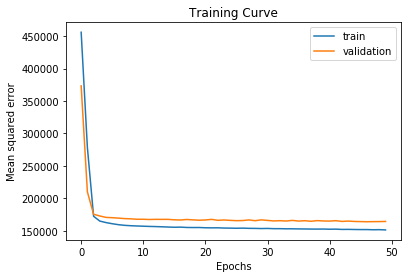

In [16]:
import matplotlib.pyplot as plt

# plot loss during training
def plot_loss(hist):
    %matplotlib inline
    plt.title('Training Curve')
    plt.plot(hist.history['loss'], label='train')
    plt.plot(hist.history['val_loss'], label='validation')
    plt.xlabel("Epochs")
    plt.ylabel("Mean squared error")
    plt.legend()
    plt.show()

plot_loss(best_train)



### Standardize your features:
* Typically assumes normally distributed feature, shifting mean to 0 and standard deviation to 1
* In theory does not matter for neural networks
* In practice tends to matter for neural networks
* Scale if using:
    - Logistic regression
    - Support vector machines
    - Perceptrons
    - Neural networks
    - Principle component analysis
* Don't bother if using:
    - "Forest" methods
    - Naive Bayes

In [17]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
in_scaler = StandardScaler()

# Fit scaler to the training set and perform the transformation
selected_feature_train = in_scaler.fit_transform(selected_feature_train)

# Use the fitted scaler to transform validation and test features
selected_feature_val = in_scaler.transform(selected_feature_val)
selected_feature_test = in_scaler.transform(selected_feature_test)

# Check appropriate scaling
print(np.mean(selected_feature_train[:,0]))
print(np.std(selected_feature_train[:,0]))

print(np.mean(selected_feature_val[:,0]))
print(np.std(selected_feature_val[:,0]))

print(np.mean(selected_feature_test[:,0]))
print(np.std(selected_feature_test[:,0]))

-9.158106372019069e-17
1.0
0.016119707489855875
0.9970087526331801
0.09330835574898895
0.9414925643047213


In [ ]:
model = nn_model()

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=100, batch_size=128,
            validation_data=(selected_feature_val, price_val))
model_score = score(model.predict(selected_feature_test), price_test)
print(model_score)

plot_loss(history)

Train on 18000 samples, validate on 2000 samples
Epoch 1/100
18000/18000 [==============================] - 2s 110us/step - loss: 416645830992.7822 - val_loss: 456241971200.0000
Epoch 2/100
18000/18000 [==============================] - 1s 56us/step - loss: 416218113288.8747 - val_loss: 455213074612.2240
Epoch 3/100
18000/18000 [==============================] - 1s 50us/step - loss: 414424552672.8249 - val_loss: 452046622818.3040
Epoch 4/100
18000/18000 [==============================] - 1s 50us/step - loss: 410226954396.5582 - val_loss: 445697031667.7120
Epoch 5/100
18000/18000 [==============================] - 1s 47us/step - loss: 402827681289.5574 - val_loss: 435398948421.6320
Epoch 6/100
18000/18000 [==============================] - 1s 53us/step - loss: 391654131164.0463 - val_loss: 420623121121.2800
Epoch 7/100
18000/18000 [==============================] - 1s 67us/step - loss: 376345412210.2329 - val_loss: 401105718345.7280
Epoch 8/100
18000/18000 [=============================

#### In the future, consider standardizing outputs as well

### Regularize:
* Heavily parameterized models like neural networks are prone to overfitting
* Popular off-the-shelf tools exist to regularize models and prevent overfitting:
    - L2 regularization (weight decay)
    - Dropout
    - Batch normalization
    
#### These tools come as standard Keras/TF layers!
`model.add(keras.layers.Dropout(rate)`
`model.add(keras.layers.ActivityRegularization(l1=0.0, l2=0.0)`
`model.add(keras.layers.BatchNormalization())`

### Early stopping and model checkpointing:
#### It's unlikely the last iteration is the best, and who knows how long until the thing is converged. Just grab the best validation error.

Train on 18000 samples, validate on 2000 samples
Epoch 1/400
18000/18000 [==============================] - 2s 122us/step - loss: 416645088222.3218 - val_loss: 456236671434.7521

Epoch 00001: val_loss improved from inf to 456236671434.75201, saving model to best_model.h5
Epoch 2/400
18000/18000 [==============================] - 1s 62us/step - loss: 416197657056.5974 - val_loss: 455164537864.1920

Epoch 00002: val_loss improved from 456236671434.75201 to 455164537864.19202, saving model to best_model.h5
Epoch 3/400
18000/18000 [==============================] - 1s 66us/step - loss: 414400001401.7422 - val_loss: 452025910820.8641

Epoch 00003: val_loss improved from 455164537864.19202 to 452025910820.86401, saving model to best_model.h5
Epoch 4/400
18000/18000 [==============================] - 1s 63us/step - loss: 410371744945.4933 - val_loss: 445906115887.1040

Epoch 00004: val_loss improved from 452025910820.86401 to 445906115887.10400, saving model to best_model.h5
Epoch 5/400
18000

Epoch 36/400
18000/18000 [==============================] - 2s 98us/step - loss: 66751103209.0169 - val_loss: 69857330593.7920

Epoch 00036: val_loss improved from 70637041188.86400 to 69857330593.79201, saving model to best_model.h5
Epoch 37/400
18000/18000 [==============================] - 1s 65us/step - loss: 66001783550.4071 - val_loss: 69088201703.4240

Epoch 00037: val_loss improved from 69857330593.79201 to 69088201703.42400, saving model to best_model.h5
Epoch 38/400
18000/18000 [==============================] - 1s 52us/step - loss: 65259026411.9751 - val_loss: 68354475753.4720

Epoch 00038: val_loss improved from 69088201703.42400 to 68354475753.47200, saving model to best_model.h5
Epoch 39/400
18000/18000 [==============================] - 1s 53us/step - loss: 64521657971.1431 - val_loss: 67613030645.7600

Epoch 00039: val_loss improved from 68354475753.47200 to 67613030645.76000, saving model to best_model.h5
Epoch 40/400
18000/18000 [==============================] - 1s 5

18000/18000 [==============================] - 1s 48us/step - loss: 43203405716.5938 - val_loss: 47153690738.6880

Epoch 00071: val_loss improved from 47630259355.64800 to 47153690738.68800, saving model to best_model.h5
Epoch 72/400
18000/18000 [==============================] - 1s 52us/step - loss: 42679820593.8347 - val_loss: 46684520611.8400

Epoch 00072: val_loss improved from 47153690738.68800 to 46684520611.84000, saving model to best_model.h5
Epoch 73/400
18000/18000 [==============================] - 1s 49us/step - loss: 42188650075.4773 - val_loss: 46244600971.2640

Epoch 00073: val_loss improved from 46684520611.84000 to 46244600971.26400, saving model to best_model.h5
Epoch 74/400
18000/18000 [==============================] - 1s 51us/step - loss: 41699817934.3929 - val_loss: 45842708004.8640

Epoch 00074: val_loss improved from 46244600971.26400 to 45842708004.86400, saving model to best_model.h5
Epoch 75/400
18000/18000 [==============================] - 1s 52us/step - lo

18000/18000 [==============================] - 1s 49us/step - loss: 35734134747.5911 - val_loss: 40943851732.9920

Epoch 00106: val_loss improved from 40975216181.24800 to 40943851732.99200, saving model to best_model.h5
Epoch 107/400
18000/18000 [==============================] - 1s 53us/step - loss: 35662241264.0711 - val_loss: 40829336387.5840

Epoch 00107: val_loss improved from 40943851732.99200 to 40829336387.58400, saving model to best_model.h5
Epoch 108/400
18000/18000 [==============================] - 1s 51us/step - loss: 35598459100.2738 - val_loss: 40757999697.9200

Epoch 00108: val_loss improved from 40829336387.58400 to 40757999697.92000, saving model to best_model.h5
Epoch 109/400
18000/18000 [==============================] - 1s 52us/step - loss: 35503797390.9049 - val_loss: 40652122750.9760

Epoch 00109: val_loss improved from 40757999697.92000 to 40652122750.97600, saving model to best_model.h5
Epoch 110/400
18000/18000 [==============================] - 1s 51us/step 

18000/18000 [==============================] - 1s 48us/step - loss: 33696992580.9493 - val_loss: 38764493045.7600

Epoch 00141: val_loss improved from 38772498497.53600 to 38764493045.76000, saving model to best_model.h5
Epoch 142/400
18000/18000 [==============================] - 1s 51us/step - loss: 33650815842.5316 - val_loss: 38692661329.9200

Epoch 00142: val_loss improved from 38764493045.76000 to 38692661329.92000, saving model to best_model.h5
Epoch 143/400
18000/18000 [==============================] - 1s 61us/step - loss: 33599817602.3893 - val_loss: 38661002297.3440

Epoch 00143: val_loss improved from 38692661329.92000 to 38661002297.34400, saving model to best_model.h5
Epoch 144/400
18000/18000 [==============================] - 1s 51us/step - loss: 33556876561.9769 - val_loss: 38601671704.5760

Epoch 00144: val_loss improved from 38661002297.34400 to 38601671704.57600, saving model to best_model.h5
Epoch 145/400
18000/18000 [==============================] - 1s 48us/step 

Epoch 177/400
18000/18000 [==============================] - 1s 50us/step - loss: 32635938470.1156 - val_loss: 37633564672.0000

Epoch 00177: val_loss improved from 37658896662.52800 to 37633564672.00000, saving model to best_model.h5
Epoch 178/400
18000/18000 [==============================] - 1s 61us/step - loss: 32617037973.2764 - val_loss: 37613019136.0000

Epoch 00178: val_loss improved from 37633564672.00000 to 37613019136.00000, saving model to best_model.h5
Epoch 179/400
18000/18000 [==============================] - 1s 53us/step - loss: 32604205929.8133 - val_loss: 37593009618.9440

Epoch 00179: val_loss improved from 37613019136.00000 to 37593009618.94400, saving model to best_model.h5
Epoch 180/400
18000/18000 [==============================] - 1s 52us/step - loss: 32580118923.0364 - val_loss: 37583775039.4880

Epoch 00180: val_loss improved from 37593009618.94400 to 37583775039.48800, saving model to best_model.h5
Epoch 181/400
18000/18000 [==============================] -

Epoch 214/400
18000/18000 [==============================] - 1s 53us/step - loss: 32003748646.4569 - val_loss: 37021387816.9600

Epoch 00214: val_loss improved from 37044407304.19200 to 37021387816.96000, saving model to best_model.h5
Epoch 215/400
18000/18000 [==============================] - 1s 75us/step - loss: 31999111532.0889 - val_loss: 37007264350.2080

Epoch 00215: val_loss improved from 37021387816.96000 to 37007264350.20800, saving model to best_model.h5
Epoch 216/400
18000/18000 [==============================] - 2s 84us/step - loss: 31977107976.6471 - val_loss: 36994526281.7280

Epoch 00216: val_loss improved from 37007264350.20800 to 36994526281.72800, saving model to best_model.h5
Epoch 217/400
18000/18000 [==============================] - 1s 78us/step - loss: 31959212053.8453 - val_loss: 36972025118.7200

Epoch 00217: val_loss improved from 36994526281.72800 to 36972025118.72000, saving model to best_model.h5
Epoch 218/400
18000/18000 [==============================] -

Epoch 288/400
18000/18000 [==============================] - 1s 46us/step - loss: 30988646835.0862 - val_loss: 36013876576.2560

Epoch 00288: val_loss improved from 36031472205.82400 to 36013876576.25600, saving model to best_model.h5
Epoch 289/400
18000/18000 [==============================] - 1s 53us/step - loss: 30969067481.7707 - val_loss: 36004972625.9200

Epoch 00289: val_loss improved from 36013876576.25600 to 36004972625.92000, saving model to best_model.h5
Epoch 290/400
18000/18000 [==============================] - 1s 58us/step - loss: 30956659987.7973 - val_loss: 36003181821.9520

Epoch 00290: val_loss improved from 36004972625.92000 to 36003181821.95200, saving model to best_model.h5
Epoch 291/400
18000/18000 [==============================] - 1s 55us/step - loss: 30937490618.5956 - val_loss: 35994889388.0320

Epoch 00291: val_loss improved from 36003181821.95200 to 35994889388.03200, saving model to best_model.h5
Epoch 292/400
18000/18000 [==============================] -

18000/18000 [==============================] - 1s 47us/step - loss: 30554882730.6667 - val_loss: 35575017570.3040

Epoch 00324: val_loss improved from 35587345711.10400 to 35575017570.30400, saving model to best_model.h5
Epoch 325/400
18000/18000 [==============================] - 1s 46us/step - loss: 30537830861.4827 - val_loss: 35585016168.4480

Epoch 00325: val_loss did not improve from 35575017570.30400
Epoch 326/400
18000/18000 [==============================] - 1s 43us/step - loss: 30530092886.6987 - val_loss: 35569878368.2560

Epoch 00326: val_loss improved from 35575017570.30400 to 35569878368.25600, saving model to best_model.h5
Epoch 327/400
18000/18000 [==============================] - 1s 47us/step - loss: 30516127121.4080 - val_loss: 35591999946.7520

Epoch 00327: val_loss did not improve from 35569878368.25600
Epoch 328/400
18000/18000 [==============================] - 1s 46us/step - loss: 30514390080.6258 - val_loss: 35568368189.4400

Epoch 00328: val_loss improved from

18000/18000 [==============================] - 1s 43us/step - loss: 30152967640.4053 - val_loss: 35193901350.9120

Epoch 00361: val_loss improved from 35199309119.48800 to 35193901350.91200, saving model to best_model.h5
Epoch 362/400
18000/18000 [==============================] - 1s 47us/step - loss: 30139642995.5982 - val_loss: 35197942824.9600

Epoch 00362: val_loss did not improve from 35193901350.91200
Epoch 363/400
18000/18000 [==============================] - 1s 46us/step - loss: 30128694460.4160 - val_loss: 35189572599.8080

Epoch 00363: val_loss improved from 35193901350.91200 to 35189572599.80800, saving model to best_model.h5
Epoch 364/400
18000/18000 [==============================] - 1s 46us/step - loss: 30123290600.3342 - val_loss: 35177944580.0960

Epoch 00364: val_loss improved from 35189572599.80800 to 35177944580.09600, saving model to best_model.h5
Epoch 365/400
18000/18000 [==============================] - 1s 46us/step - loss: 30118028900.5796 - val_loss: 35179561

18000/18000 [==============================] - 1s 48us/step - loss: 29800239515.4204 - val_loss: 34851138633.7280

Epoch 00398: val_loss did not improve from 34849582579.71200
Epoch 399/400
18000/18000 [==============================] - 1s 47us/step - loss: 29814908483.8116 - val_loss: 34851638149.1200

Epoch 00399: val_loss did not improve from 34849582579.71200
Epoch 400/400
18000/18000 [==============================] - 1s 46us/step - loss: 29797488394.2400 - val_loss: 34813784293.3760

Epoch 00400: val_loss improved from 34849582579.71200 to 34813784293.37600, saving model to best_model.h5
Model score: 0.6566940217993732


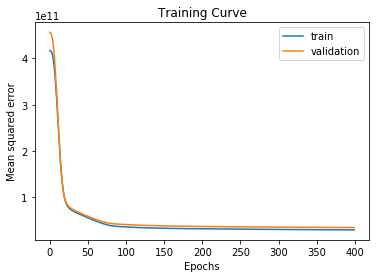

In [20]:
# Set callback functions to early stop training and save the 
# best model so far
from keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [EarlyStopping(monitor='val_loss', patience=5),
            ModelCheckpoint(filepath='best_model.h5',
                            monitor='val_loss',
                            save_best_only=True,
                           verbose=1)]

model = nn_model(layers=[20,20,20])

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(selected_feature_train, price_train,
            epochs=400, callbacks=callbacks, batch_size=128,
            validation_data=(selected_feature_val, price_val))

model_score = score(model.predict(selected_feature_val), price_val)
print(f"Model score: {model_score}")
plot_loss(history)


### You don't have to remember these resources because they're here when you need them
https://www.tensorflow.org/api_docs

https://keras.io/

https://www.tensorflow.org/tutorials/

https://www.google.com

### Don't trust me, trust your validation errors
### Don't look at your test set until you're actually going to test